<a href="https://colab.research.google.com/github/GalaAldebara/PCVK_IqbalMakmur/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


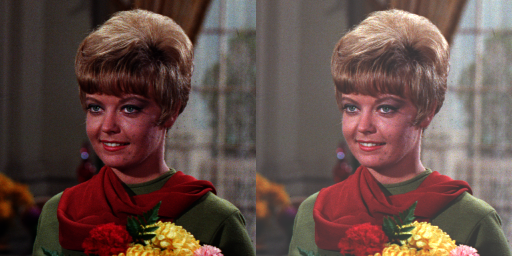

In [ ]:
import cv2 # Make sure to import the cv2 module
from google.colab.patches import cv2_imshow # You will need this to display images in Colab
import numpy as np

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Nilai harus berupa angka')

original = cv2.imread('/content/drive/MyDrive/Images/female.tiff') # Changed cv to cv2
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv2.hconcat([original, brightness_image])
cv2_imshow(final_frame)

**Tugas Praktikum**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian ulasan teori, sehingga menghasilkan keluaran seperti berikut:

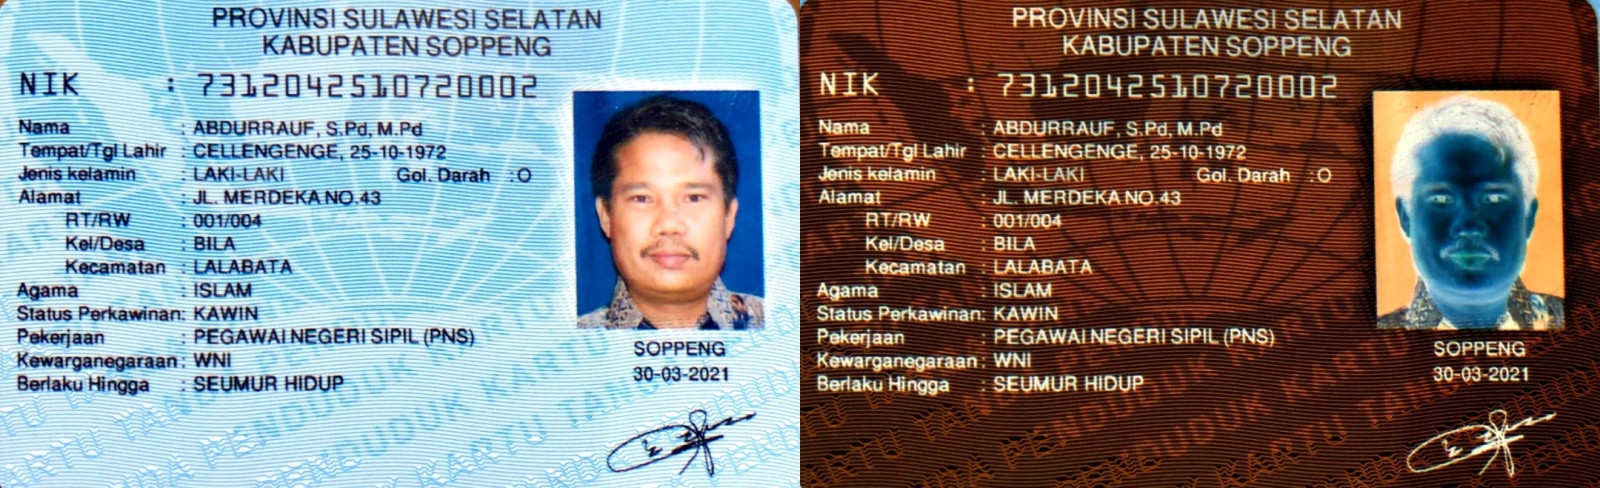

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar
image = cv2.imread('/content/drive/MyDrive/Images/KTP.jpeg')

# Membuat citra inverse secara manual
inverse_image = np.zeros(image.shape, image.dtype)

for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            inverse_image[y, x, c] = 255 - image[y, x, c]

# Menggabungkan citra asli dan citra inverse
final_frame = cv2.hconcat([image, inverse_image])

# Menampilkan hasil
cv2_imshow(final_frame)


2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga menghasilkan keluaran seperti berikut:

Mengubah kontras dan tingkat kecerahan citra
Masukkan nilai brightness [-255 - 255]: 255
Masukkan nilai contrast [1.0 - 3.0]: 2


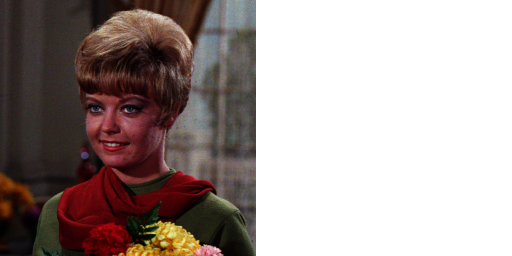

In [ ]:
print("Mengubah kontras dan tingkat kecerahan citra")
print("==============================================")

# Input brightness dan contrast dari user
try:
  brightness = int(input("Masukkan nilai brightness [-255 - 255]: "))
  contrast = int(input("Masukkan nilai contrast [1.0 - 3.0]: "))
except ValueError:
  print("Input harus berupa angka")

# Load Image
original_image = cv2.imread("/content/drive/MyDrive/Images/female.tiff")
contrast_image = np.zeros(original_image.shape, original_image.dtype)

# Melakukan looping untuk menambahkan contrast dan brightness
for y in range(original_image.shape[0]):
  for x in range(original_image.shape[1]):
    for c in range(original_image.shape[2]):
      contrast_image[y, x, c] = np.clip(contrast * original_image[y, x, c] + brightness, 0, 255)

# Menampilkan perbandingan image akhir
final_frame = cv2.hconcat((original_image, contrast_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log. Sehingga menghasilkan keluaran seperti berikut.

Mengubah tingkat kecerahan citra dengan Transformasi Log
-------------------------------------------------------
Masukkan nilai kecerahan: 50


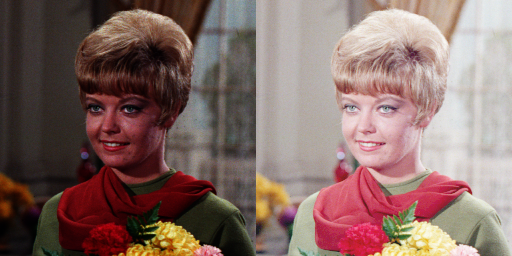

In [ ]:
import cv2 # Pastikan untuk mengimpor modul cv2
from google.colab.patches import cv2_imshow # Untuk menampilkan gambar di Colab
import numpy as np

print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('-------------------------------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Nilai harus berupa angka')

# Membaca gambar berwarna
original = cv2.imread('/content/drive/MyDrive/Images/female.tiff')

if original is None:
    print("Error: Gambar tidak ditemukan.")
else:
    # Inisialisasi konstanta penskalaan log
    c = 255 / np.log(1 + np.max(original))

    # Transformasi logaritmik pada setiap kanal warna
    log_image = np.zeros(original.shape, original.dtype)
    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
            for c_index in range(original.shape[2]):
                log_image[y, x, c_index] = c * np.log(1 + original[y, x, c_index])

    # Konversi kembali ke tipe data uint8
    log_image = np.array(log_image, dtype=np.uint8)

    # Gabungkan gambar asli dan hasil transformasi logaritmik
    final_frame = cv2.hconcat([original, log_image])

    # Tampilkan hasil gambar
    cv2_imshow(final_frame)


4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:


a. Averaging

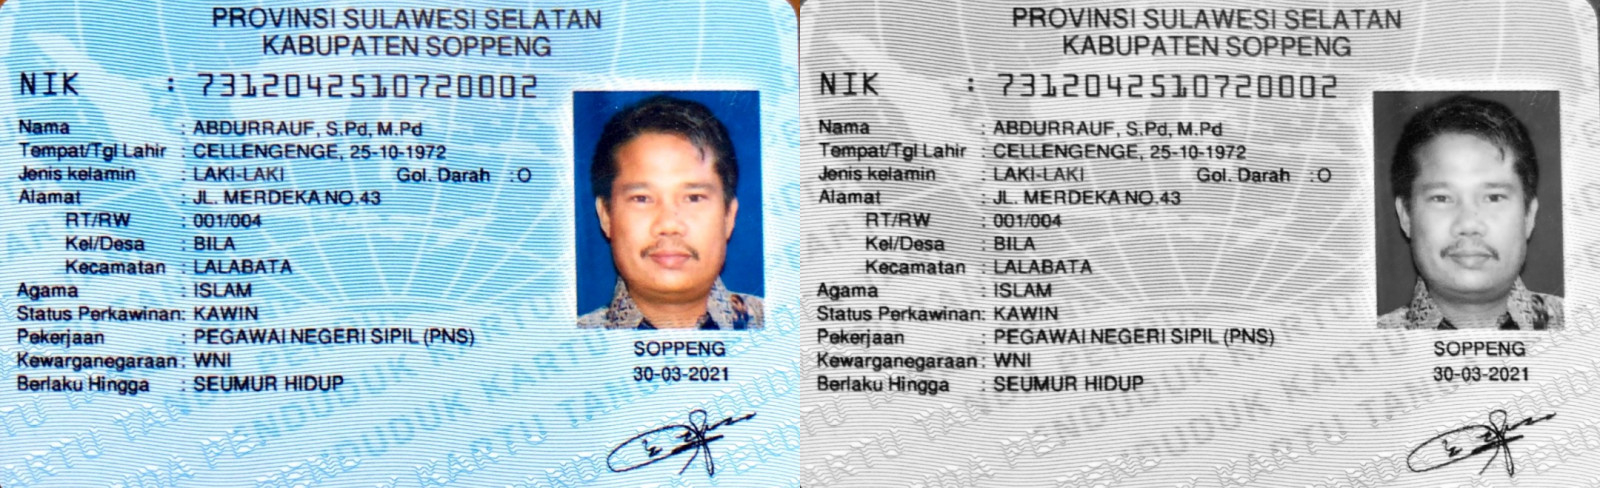

In [ ]:
original_image = cv2.imread("/content/drive/MyDrive/Images/KTP.jpeg")
grayscale_avg_image = np.mean(original_image, axis=2)

grayscale_avg_image = cv2.cvtColor(grayscale_avg_image.astype(original_image.dtype), cv2.COLOR_GRAY2BGR)

# Menampilkan image perbandingan dengan original image dan grayscale average
final_frame = cv2.hconcat((original_image, grayscale_avg_image))
cv2_imshow(final_frame)

b. Lightness

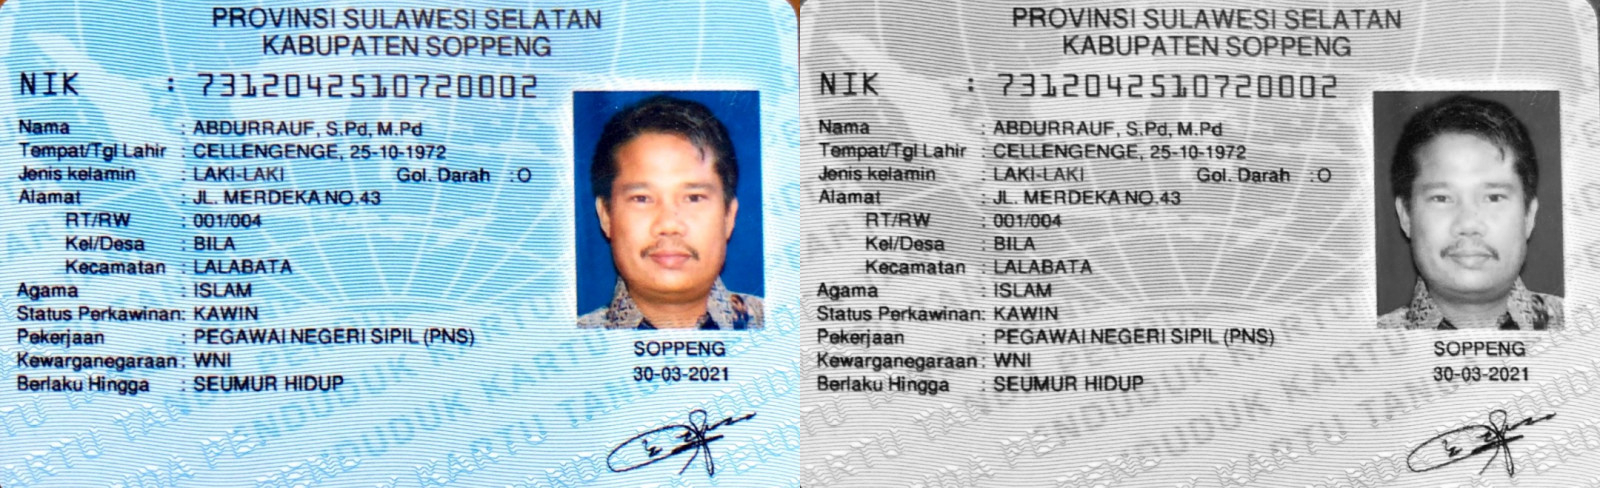

In [ ]:
original_image = cv2.imread("/content/drive/MyDrive/Images/KTP.jpeg")
# grayscale_lightness_image = np.zeros((original_image.shape[0], original_image.shape[1]), original_image.dtype)

# Membuat array grayscale 1 channel
grayscale_lightness_image = np.zeros((original_image.shape[0], original_image.shape[1]), dtype=np.uint8)

# Looping untuk mengubah RGB image menggunakan lightness method
for y in range(original_image.shape[0]):
    for x in range(original_image.shape[1]):
        max_rgb = np.float32(max(original_image[y, x, 2], original_image[y, x, 1], original_image[y, x, 0]))
        min_rgb = np.float32(min(original_image[y, x, 2], original_image[y, x, 1], original_image[y, x, 0]))
        lightness = (max_rgb + min_rgb) / 2
        grayscale_lightness_image[y, x] = np.uint8(np.clip(lightness, 0, 255))

# Mengubah grayscale image kembali ke 3 channel untuk ditampilkan
grayscale_3channel = cv2.cvtColor(grayscale_lightness_image, cv2.COLOR_GRAY2BGR)

# Menampilkan image perbandingan dengan original image dan grayscale average
final_frame = cv2.hconcat((original_image, grayscale_3channel))
cv2_imshow(final_frame)